# Deep Learning Model 

First Deep Learning model. The goal is to train a model that i can later apply for other projects. 

Dataset is Watkins Marine Mammal dataset.

The goal of the model is ...




---




Of all data we'll use:
- 70% for training
- 15% for validation
- 15% for test

## Setting up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import random
import os
import sys

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
ROOT_PATH = Path("..")  
sys.path.append(str(ROOT_PATH))
from src.dataloaders import get_dataloaders
from src.model import EfficientNetSpectrogram
from src.model import BaselineCNN

from src.train import Trainer

In [3]:
AUDIO_DIR = ROOT_PATH / "Data" / "Audio"
ANNOT_DIR = ROOT_PATH / "Data" / "Annotations"
SPECT_DIR = ROOT_PATH / "Data" / "Spectrograms"

ANNOT_FILE = ANNOT_DIR / "audio_annotations.csv"

train_df = pd.read_csv(ANNOT_DIR / "train.csv")
val_df   = pd.read_csv(ANNOT_DIR / "val.csv")
test_df  = pd.read_csv(ANNOT_DIR / "test.csv")

## Showcase

In [4]:
df = pd.read_csv(ANNOT_FILE)
print(len(df))
print("Train:", len(train_df))
print("Val:  ", len(val_df))
print("Test: ", len(test_df))

15407
Train: 10784
Val:   2311
Test:  2312


HumpbackWhale ---  shape: (1, 128, 290)
Boutu_AmazonRiverDolphin ---  shape: (1, 128, 317)
SpinnerDolphin ---  shape: (1, 128, 135)


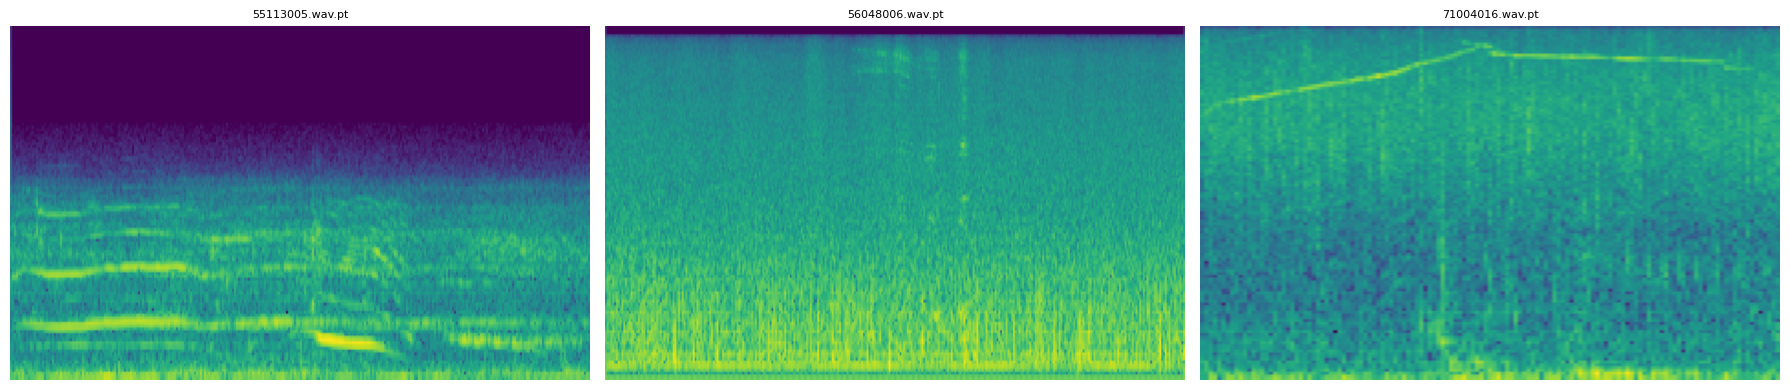

In [5]:
base_dir = ROOT_PATH / "Data" / "Spectrograms" / "train"

all_files = []
for root, dirs, files in os.walk(base_dir):
    for f in files:
        if f.endswith(".pt"):
            relative_path = os.path.join(root, f)
            all_files.append(relative_path)

if len(all_files) < 3:
    raise ValueError("Not enough .pt files found.")

# Select 3 random spectrograms
samples = random.sample(all_files, 3)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for ax, path in zip(axes, samples):
    tensor = torch.load(path)

    species_name = os.path.basename(os.path.dirname(path))
    # Print the tensor shape and name
    print(f"{species_name} ---  shape: {tuple(tensor.shape)}")

    # Convert tensor to 2D for plotting
    if tensor.dim() == 2:
        img = tensor
    elif tensor.dim() == 3:
        # assume [C, H, W]
        img = tensor[0]  
    else:
        raise ValueError(f"Unexpected tensor shape: {tensor.shape}")

    ax.imshow(img.numpy(), aspect="auto", origin="lower", cmap="viridis")
    ax.set_title(os.path.basename(path), fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()

## CNN

Dataloader

In [6]:
SPEC_ROOT = ROOT_PATH / "Data" / "Spectrograms"

# Use a larger batch size and enable in-memory cache for training if RAM allows
train_loader, val_loader, test_loader = get_dataloaders(
    SPEC_ROOT,
    batch_size=32,
    num_workers=4
)

## Training

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Baseline training
trainer = Trainer(
    spectrogram_dir=ROOT_PATH / "Data" / "Spectrograms",
    checkpoint_path=ROOT_PATH / "baseline_best.pth",
    model_name="baseline",
    batch_size=32,
    max_epochs=10,
    lr=1e-3,
    device=device,
)
trainer.fit()

Train samples: 10784
Train batches: 337


Epoch 1/10 Validation: 100%|████████████████████████| 73/73 [01:35<00:00,  1.31s/batch, loss=3.5250]

Epoch 1/10 | Train Loss: 3.6139 | Val Loss: 3.0175 | Train Acc: 7.15 | Val Acc: 14.37
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 2/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.99batch/s, loss=2.1033]

Epoch 2/10 | Train Loss: 2.9513 | Val Loss: 2.5665 | Train Acc: 21.12 | Val Acc: 26.66
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 3/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.89batch/s, loss=1.2046]

Epoch 3/10 | Train Loss: 2.5468 | Val Loss: 2.4083 | Train Acc: 28.77 | Val Acc: 26.87
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 4/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.96batch/s, loss=1.0039]

Epoch 4/10 | Train Loss: 2.2726 | Val Loss: 1.9388 | Train Acc: 36.80 | Val Acc: 40.29
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 5/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.97batch/s, loss=0.7745]

Epoch 5/10 | Train Loss: 2.0444 | Val Loss: 1.8178 | Train Acc: 43.56 | Val Acc: 46.52
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 6/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.84batch/s, loss=1.2729]

Epoch 6/10 | Train Loss: 1.7596 | Val Loss: 1.4202 | Train Acc: 50.46 | Val Acc: 57.72
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 7/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.98batch/s, loss=0.3854]

Epoch 7/10 | Train Loss: 1.5691 | Val Loss: 1.1378 | Train Acc: 56.60 | Val Acc: 63.39
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 8/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.92batch/s, loss=0.1337]

Epoch 8/10 | Train Loss: 1.3997 | Val Loss: 1.1406 | Train Acc: 60.39 | Val Acc: 65.56
No improvement for 1/3 epochs



Epoch 9/10 Validation: 100%|████████████████████████| 73/73 [00:18<00:00,  3.96batch/s, loss=2.0359]

Epoch 9/10 | Train Loss: 1.2551 | Val Loss: 0.9966 | Train Acc: 64.31 | Val Acc: 69.45
Saved improved checkpoint to: ..\baseline_best.pth



Epoch 10/10 Validation: 100%|███████████████████████| 73/73 [00:18<00:00,  3.98batch/s, loss=0.7313]

Epoch 10/10 | Train Loss: 1.1695 | Val Loss: 0.8765 | Train Acc: 67.97 | Val Acc: 73.04
Saved improved checkpoint to: ..\baseline_best.pth
Training finished.


In [8]:
# EfficientNet training
eff_trainer = Trainer(
    spectrogram_dir=ROOT_PATH / "Data" / "Spectrograms",
    checkpoint_path=ROOT_PATH / "efficientnet_best.pth",
    model_name="efficientnet",
    batch_size=32,
    max_epochs=10,
    lr=1e-4,
    device=device,
)
eff_trainer.fit()

Train samples: 10784
Train batches: 337


Epoch 1/10 Validation: 100%|████████████████████████| 73/73 [00:52<00:00,  1.39batch/s, loss=1.6101]

Epoch 1/10 | Train Loss: 2.5179 | Val Loss: 1.3257 | Train Acc: 48.70 | Val Acc: 69.75


Saved improved checkpoint to: ..\efficientnet_best.pth


Epoch 2/10 Validation: 100%|████████████████████████| 73/73 [00:55<00:00,  1.32batch/s, loss=1.0585]

Epoch 2/10 | Train Loss: 1.0184 | Val Loss: 0.5898 | Train Acc: 73.97 | Val Acc: 83.73


Saved improved checkpoint to: ..\efficientnet_best.pth


Epoch 3/10 Validation: 100%|████████████████████████| 73/73 [00:53<00:00,  1.36batch/s, loss=0.5803]

Epoch 3/10 | Train Loss: 0.5285 | Val Loss: 0.3333 | Train Acc: 85.25 | Val Acc: 90.09


Saved improved checkpoint to: ..\efficientnet_best.pth


Epoch 4/10 Validation: 100%|████████████████████████| 73/73 [00:53<00:00,  1.37batch/s, loss=0.1212]

Epoch 4/10 | Train Loss: 0.3567 | Val Loss: 0.2400 | Train Acc: 89.76 | Val Acc: 92.04


Saved improved checkpoint to: ..\efficientnet_best.pth


Epoch 5/10 Validation: 100%|████████████████████████| 73/73 [00:52<00:00,  1.38batch/s, loss=0.2089]

Epoch 5/10 | Train Loss: 0.2418 | Val Loss: 0.2098 | Train Acc: 92.61 | Val Acc: 92.95


Saved improved checkpoint to: ..\efficientnet_best.pth


Epoch 6/10 Validation: 100%|████████████████████████| 73/73 [00:52<00:00,  1.40batch/s, loss=0.0712]

Epoch 6/10 | Train Loss: 0.1918 | Val Loss: 0.2131 | Train Acc: 94.07 | Val Acc: 93.68
No improvement for 1/3 epochs



Epoch 7/10 Validation: 100%|████████████████████████| 73/73 [00:53<00:00,  1.35batch/s, loss=0.7860]

Epoch 7/10 | Train Loss: 0.1656 | Val Loss: 0.1741 | Train Acc: 94.84 | Val Acc: 94.12


Saved improved checkpoint to: ..\efficientnet_best.pth


Epoch 8/10 Validation: 100%|████████████████████████| 73/73 [00:52<00:00,  1.38batch/s, loss=1.3899]

Epoch 8/10 | Train Loss: 0.1428 | Val Loss: 0.2120 | Train Acc: 95.77 | Val Acc: 93.60
No improvement for 1/3 epochs



Epoch 9/10 Validation: 100%|████████████████████████| 73/73 [01:46<00:00,  1.46s/batch, loss=0.1395]

Epoch 9/10 | Train Loss: 0.1225 | Val Loss: 0.1727 | Train Acc: 96.32 | Val Acc: 94.98
Saved improved checkpoint to: ..\efficientnet_best.pth



Epoch 10/10 Validation: 100%|███████████████████████| 73/73 [01:46<00:00,  1.46s/batch, loss=0.5659]

Epoch 10/10 | Train Loss: 0.1292 | Val Loss: 0.2044 | Train Acc: 96.63 | Val Acc: 94.16
No improvement for 1/3 epochs
Training finished.
